## Example Code to load a json file of tweets, then use afinn package to do sentiment analysis

Information about the afinn dataset: https://finnaarupnielsen.wordpress.com/2011/03/16/afinn-a-new-word-list-for-sentiment-analysis/

Information about the afinn package:http://rkuykendall.com/articles/simple-sentiment-analysis-in-python-using-afinn/

In the first step we import needed packages, read a json file, and then CAREFULLY choose which lines to analyze. The try structure allows the code to continue even if there is an error. The if statements skip lines in the file that don't have the information we need.

In [32]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from afinn import Afinn

tweets_data_path = 'oschasers.json'
with open(tweets_data_path) as json_file:
    tweets_data = json.load(json_file)

print(len(tweets_data))

200


We will use the Pandas DataFrame to hold the information. In this case, we construct the dataframe manually from the information in the list called tweets_data. The afinn line shows how easy it is to get a score for a piece of text.

In some cases, we have to look another layer deeper to get the tweet information we want. That is true for finding the country...we have to look into place then into country.

More importantly, the favorite and retweet counts are in a container called retweeted_status.

In [33]:
tweets = pd.DataFrame()
#ADD columns to dataframe
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] is not None else None, tweets_data))

tweets['favorite_count'] = list(map(lambda tweet: int(tweet['favorite_count']), tweets_data))
tweets['retweet_count'] = list(map(lambda tweet: int(tweet['retweet_count']), tweets_data))
	
afinn = Afinn(emoticons=True)
tweets['sentiment'] = list(map(lambda tweet: afinn.score(tweet['text']), tweets_data ))

tweets['created'] = list(map(lambda tweet: tweet['created_at'], tweets_data))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B234BE7C08>]],
      dtype=object)

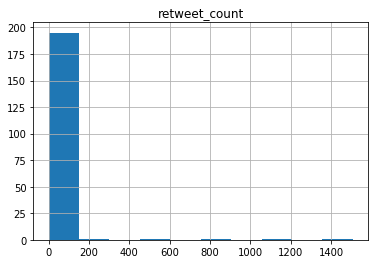

In [34]:
#We can use the hist function for a DataFrame to draw a chart!
tweets.hist(column='retweet_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B23484B188>]],
      dtype=object)

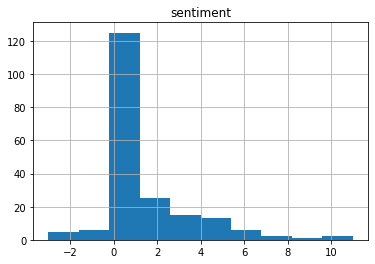

In [35]:
tweets.hist(column='sentiment')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2349DA6C8>]],
      dtype=object)

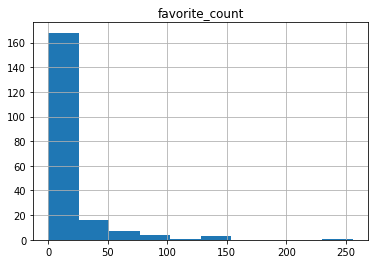

In [36]:
tweets.hist(column='favorite_count')

In [37]:
#we can use the nlargest or nsmallest to see results
print(tweets.nlargest(15,'retweet_count'))

                                                  text lang country  \
76   RT @Royals: #OTD in 2015...\n\nChampions.\n\n#...   en    None   
84   RT @Royals: We have named Mike Matheny the 17t...   en    None   
105  RT @Royals: #OTD in 2015...\n\nA legend was bo...   en    None   
133  RT @Royals: #OTD in 2015, we captured our seco...   en    None   
110  RT @Royals: #OTD in 1985...\n\nThe Miracle on ...   en    None   
42   RT @Royals: Just a couple seven-time #GoldGlov...   en    None   
54   RT @Royals: Platinum-level defending? We'd say...   en    None   
55   RT @MiLB: #Royals' Kris Bubic was untouchable....   en    None   
186  RT @Royals: Whit represents your boys in blue ...   en    None   
173  RT @Omaha_Sport: Let's get one thing clear, cu...   en    None   
165  RT @WilmBlueRocks: - Paced @MiLB in strikeouts...   en    None   
58   RT @trevoaks: Thank you @Royals for the opport...   en    None   
49   RT @WilmBlueRocks: ...and the 2019 fan's choic...   en    None   
107  R

In [38]:
print(tweets.nsmallest(10,'sentiment'))

                                                  text lang country  \
64                 @MiLB @andruwgreen it's...not bad 😁   en    None   
143  You had to know this was coming. #Carma? \n\n(...   en    None   
139  @asten77 when soccer games are played, the mou...   en    None   
162  With Baseballoween a week away, Casey, @Stormy...   en    None   
188  In case you missed it: @USABaseball announced ...   en    None   
51   @RecoveringOps the vouchers are not limited to...   en    None   
57   We got a call saying we don't have to worry ab...   en    None   
85   RT @Union_Omaha: Today is the last day to drop...   en    None   
106  Time is running out to RSVP for Friendsgiving ...   en    None   
117  Don’t forget, our Garage Sale starts at 2pm &a...   en    None   

     favorite_count  retweet_count  sentiment                         created  
64                5              0       -3.0  Tue Nov 05 23:48:35 +0000 2019  
143              82             12       -3.0  Tue Oct 22 

In [39]:
badones = tweets.nsmallest(10,'sentiment')
print(badones['text'])


64                   @MiLB @andruwgreen it's...not bad 😁
143    You had to know this was coming. #Carma? \n\n(...
139    @asten77 when soccer games are played, the mou...
162    With Baseballoween a week away, Casey, @Stormy...
188    In case you missed it: @USABaseball announced ...
51     @RecoveringOps the vouchers are not limited to...
57     We got a call saying we don't have to worry ab...
85     RT @Union_Omaha: Today is the last day to drop...
106    Time is running out to RSVP for Friendsgiving ...
117    Don’t forget, our Garage Sale starts at 2pm &a...
Name: text, dtype: object


In [45]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False
tweets['Omaha Storm Chasers'] = tweets['text'].apply(lambda tweet: word_in_text('Omaha Storm Chasers', tweet))
tweets['Sacremento River Cats'] = tweets['text'].apply(lambda tweet: word_in_text('Sacremento River Cats', tweet))
tweets['Round Rock Express'] = tweets['text'].apply(lambda tweet: word_in_text('Round Rock Express', tweet))
tweets['Las Vegas Aviators'] = tweets['text'].apply(lambda tweet: word_in_text('Las Vegas Aviators', tweet))


In [46]:
prg_langs = ['Omaha Storm Chaseres', 'Sacremento River Cats', 'Round Rock Express','Las Vegas Aviators']
tweets_by_prg_lang = [tweets['Omaha Storm Chasers'].value_counts()[True], tweets['Sacremento River Cats'].value_counts()[True],tweets['Round Rock Express'].value_counts()[True],tweets['Las Vegas Aviators'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Omaha Storm Chasers vs. Sacremento River Cats vs. Round Rock Express vs. Las Vegas Aviators (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.05 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
#plt.grid()
#plt.show()

KeyError: True